# Practice session 3: Regression

# Polynomial Regression

## Polynomial Regression

Polynomial Regression은 선형 회귀의 확장으로 볼 수 있습니다. 선형 회귀가 데이터와 직선 사이의 관계를 모델링하는 반면, Polynomial Regression은 데이터와 다항식 사이의 관계를 모델링합니다.

$ y = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_p x^p + \epsilon $

여기서:
- $y$는 예측값입니다.
- $\beta_0, \beta_1, \dots, \beta_p$는 모델의 계수입니다.
- $x$는 feature입니다.
- $\epsilon$는 random noise입니다.

### 특징:
1. **비선형 데이터 모델링**: Polynomial Regression은 비선형 데이터 패턴을 캡처하기 위해 사용됩니다.
2. **다항식 차수**: 모델의 복잡성은 다항식의 차수에 따라 결정됩니다. 차수가 높을수록 모델은 더 복잡해집니다.
3. **과적합의 위험**: 높은 차수의 다항식은 데이터에 과도하게 적합할 수 있으므로, 적절한 차수 선택이 중요합니다.
4. **특성 조합**: Polynomial Regression은 기존 특성의 고차 조합을 사용하여 새로운 특성을 생성합니다.


In [ ]:
import numpy as np
import numpy.random as rnd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


np.random.seed(42)

## 데이터 만들기

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

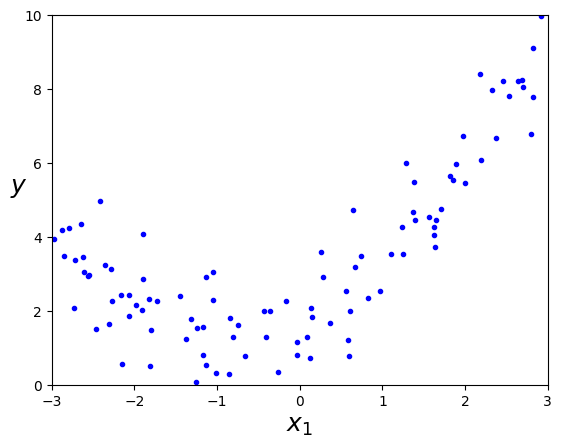

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Polynomial feature를 다음과 같이 만들 수 있습니다. 이때 우리는 2차원의 feature를 사용합니다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

생성된 feature를 이용하여 linear regression 모델을 학습합니다.

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

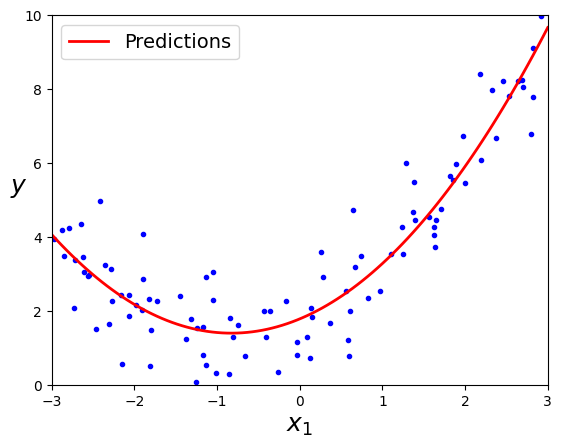

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

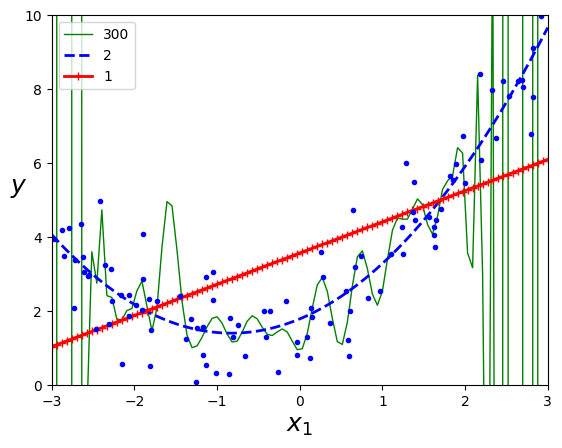

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

# Learning Curves

모델의 training 과정에서 학습 커브를 시각화 하여, 학습 과정을 살펴봅니다.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

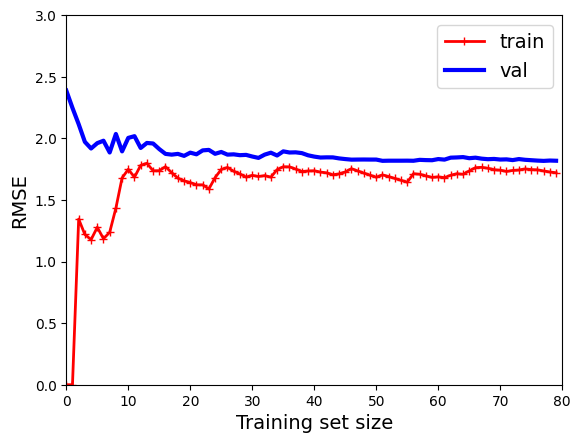

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

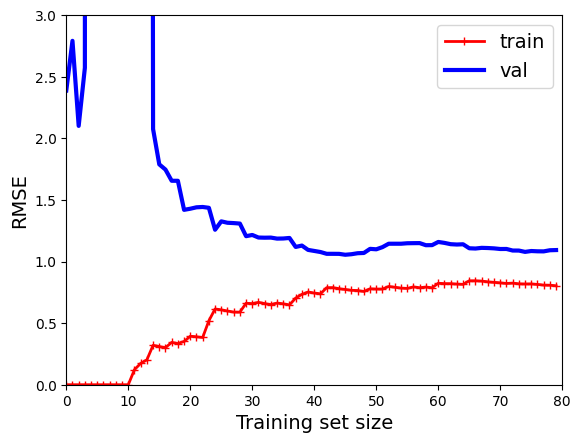

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

# Regularized Linear Models

## Ridge Regression

Ridge Regression은 선형 회귀의 일종으로, 계수의 크기에 패널티를 부여함으로써 모델의 복잡성을 제어합니다. 이는 과적합을 방지하고 일반화 성능을 향상시키는 데 도움이 됩니다.

$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n} \theta_i^2$

### 특징:
1. **L2 정규화**: Ridge Regression은 계수의 제곱에 비례하는 패널티를 사용합니다.
2. **정규화 파라미터**: $\alpha$ 값에 따라 패널티의 강도가 결정됩니다. $\alpha$가 0이면 Ridge Regression은 일반 선형 회귀와 동일합니다.

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

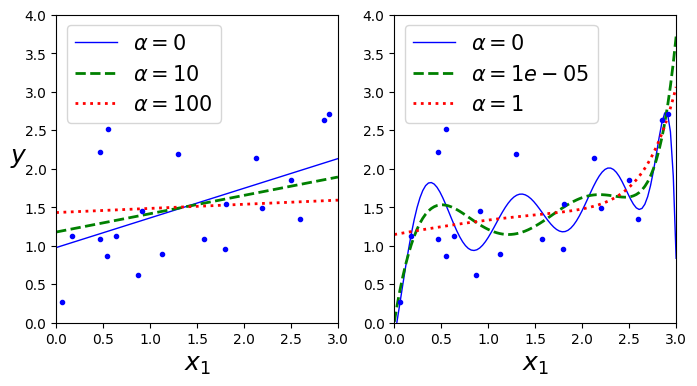

In [ ]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

## Lasso Regression


Lasso Regression은 Ridge Regression과 유사하게 계수에 패널티를 부여하지만, L1 정규화를 사용하여 일부 계수를 정확히 0으로 만듭니다. 이로 인해 불필요한 특성을 제거하게 되어 모델이 더 간단해집니다.

$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n} |\theta_i|$

### 특징:
1. **L1 정규화**: Lasso Regression은 계수의 절대값에 비례하는 패널티를 사용합니다.
2. **특성 선택**: 라쏘 회귀는 불필요한 특성의 계수를 0으로 만들어 자동으로 특성 선택을 수행합니다.



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


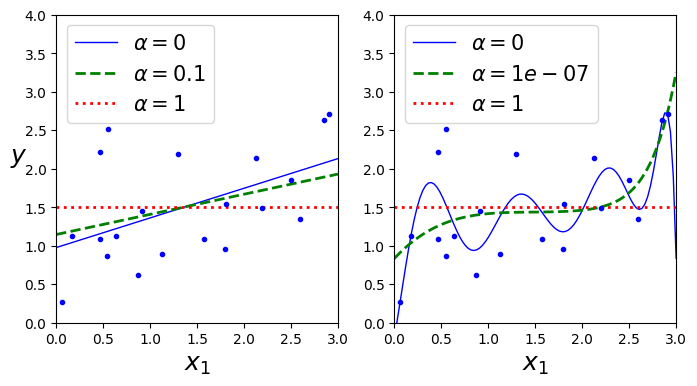

In [ ]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## Elastic Net

Elastic Net은 Ridge Regression과 Lasso Regression의 중간 형태로, 두 정규화 항을 모두 포함합니다. 이는 데이터셋의 특성 수가 훈련 샘플 수보다 많거나 여러 특성들이 강하게 연관되어 있을 때 특히 유용합니다.

$J(\theta) = MSE(\theta) + r \alpha \sum_{i=1}^{n} |\theta_i| + \frac{1-r}{2} \alpha \sum_{i=1}^{n} \theta_i^2$

### 특징:
1. **L1 & L2 정규화**: Elastic Net은 계수의 제곱(L2)과 절대값(L1)에 패널티를 동시에 부여합니다.
2. **혼합 비율**: $r$은 L1과 L2 패널티 사이의 혼합 비율을 결정합니다. $r = 0$이면 Elastic Net은 Ridge Regression과 동일하며, $r = 1$이면 Lasso Regression과 동일합니다.


In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])